# **Setup**

In [1]:
print('Installing torchquantum...')
!git clone https://github.com/mit-han-lab/torchquantum.git
%cd /content/torchquantum
!pip install --editable . 1>/dev/null
!pip install matplotlib==3.1.3 1>/dev/null
%matplotlib inline
print('All required packages have been successfully installed!')

Installing torchquantum...
Cloning into 'torchquantum'...
remote: Enumerating objects: 11804, done.
remote: Counting objects: 100% (694/694), done.
remote: Compressing objects: 100% (279/279), done.
remote: Total 11804 (delta 418), reused 670 (delta 400), pack-reused 11110
Receiving objects: 100% (11804/11804), 6.57 MiB | 6.48 MiB/s, done.
Resolving deltas: 100% (6575/6575), done.
/content/torchquantum
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchquantum 0.1.2 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
All required packages have been successfully installed!


In [2]:
import torchquantum as tq
import torchquantum.functional as tqf
import numpy as np
import matplotlib.pyplot as plt
import torch

# **1. TorchQuantum basic operations**

## 1.2 TorchQuantum Operations

tq.QuantumDevice Usage

Method 1 of using quantum gates through torchquantum.functional

In [7]:
q_dev = tq.QuantumDevice(n_wires=1)
q_dev.reset_states(bsz=1)
print(f"all zero state: {q_dev}")
tqf.h(q_dev, wires=0)
print(f"after h gate: {q_dev}")

tqf.rx(q_dev, wires=0, params=[0.3])

print(f"after rx gate: {q_dev}")

all zero state: QuantumDevice 1 wires with states: tensor([[1.+0.j, 0.+0.j]])
after h gate: QuantumDevice 1 wires with states: tensor([[0.7071+0.j, 0.7071+0.j]])
after rx gate: QuantumDevice 1 wires with states: tensor([[0.6992-0.1057j, 0.6992-0.1057j]])


all zero state: QuantumDevice 1 wires with states: tensor([[1.+0.j, 0.+0.j]])
after h gate: QuantumDevice 1 wires with states: tensor([[0.7071+0.j, 0.7071+0.j]])
after rx gate: QuantumDevice 1 wires with states: tensor([[0.6992-0.1057j, 0.6992-0.1057j]])


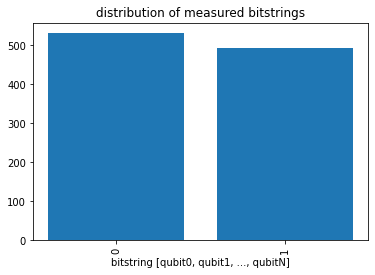

[OrderedDict([('0', 531), ('1', 493)])]


In [8]:
# method 2 of using tq.Operator
q_dev.reset_states(bsz=1)
print(f"all zero state: {q_dev}")

h_gate = tq.H()
h_gate(q_dev, wires=0)

print(f"after h gate: {q_dev}")

rx_gate = tq.RX(has_params=True, init_params=[0.3])

rx_gate(q_dev, wires=0)

print(f"after rx gate: {q_dev}")
bitstream = tq.measure(q_dev, n_shots=1024, draw_id=0)

print(bitstream)

QuantumState 2 wires 
 state: tensor([[0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j]])


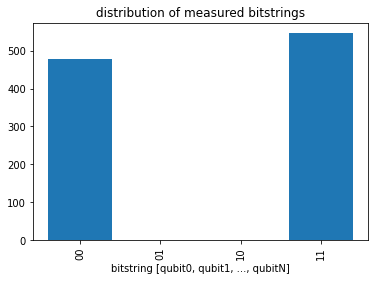

In [5]:
# tq.QuantumState to prepare a EPR pair

q_state = tq.QuantumState(n_wires=2)
q_state.h(wires=0)
q_state.cnot(wires=[0, 1])

print(q_state)
bitstream = tq.measure(q_state, n_shots=1024, draw_id=0)


QuantumState 3 wires 
 state: tensor([[0.0000+0.0000j, 0.0000+0.0000j, 0.5878+0.0000j, 0.0000-0.8090j,
         0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j]])
QuantumState 3 wires 
 state: tensor([[0.0000+0.5237j, 0.7208+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
         0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.2668j, 0.3673+0.0000j]])


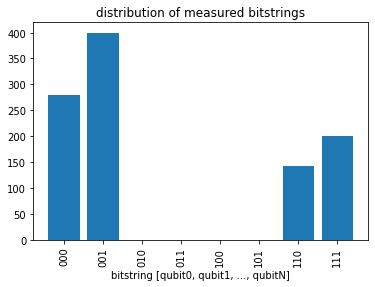

[OrderedDict([('000', 280), ('001', 400), ('010', 0), ('011', 0), ('100', 0), ('101', 0), ('110', 143), ('111', 201)])]


In [7]:
# tq.QuantumState
q_state = tq.QuantumState(n_wires=3)
q_state.x(wires=1)
q_state.rx(wires=2, params=0.6 * np.pi)
print(q_state)

q_state.ry(wires=0, params=0.3 * np.pi)

q_state.qubitunitary(wires=1, params=[[0, 1j], [-1j, 0]])

q_state.cnot(wires=[0, 1])

print(q_state)
bitstream = tq.measure(q_state, n_shots=1024, draw_id=0)

print(bitstream)

Batch mode process different states

In [8]:
# batch mode processing

q_state = tq.QuantumState(n_wires=3, bsz=64)
q_state.x(wires=1)
q_state.rx(wires=2, params=0.6 * np.pi)
print(q_state)


QuantumState 3 wires 
 state: tensor([[0.0000+0.0000j, 0.0000+0.0000j, 0.5878+0.0000j, 0.0000-0.8090j,
         0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000+0.0000j, 0.5878+0.0000j, 0.0000-0.8090j,
         0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000+0.0000j, 0.5878+0.0000j, 0.0000-0.8090j,
         0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000+0.0000j, 0.5878+0.0000j, 0.0000-0.8090j,
         0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000+0.0000j, 0.5878+0.0000j, 0.0000-0.8090j,
         0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000+0.0000j, 0.5878+0.0000j, 0.0000-0.8090j,
         0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000+0.0000j, 0.5878+0.0000j, 0.0000-0.8090j,
         0.0000

/content/torchquantum/torchquantum/states.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  states = torch.tensor(states, dtype=C_DTYPE).to(self.state.device)


In [9]:
q_state = tq.QuantumState(n_wires=2)
print(q_state)
q_state.set_states(torch.tensor([[0, 0, 1, 0], [0, 1, 0, 0]]))
print(q_state)

q_state.x(wires=0)
print(q_state)

QuantumState 2 wires 
 state: tensor([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])
QuantumState 2 wires 
 state: tensor([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])
QuantumState 2 wires 
 state: tensor([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])


In [8]:
q_state = tq.QuantumState(n_wires=2).to(torch.device('cuda'))
print(q_state)

q_state.x(wires=0)

# q_state.set_states(torch.tensor([[0, 0, 1, 0], [0, 1, 0, 0]]))
print(q_state.states.device)

q_state.x(wires=0)
print(q_state)


QuantumState 2 wires 
 state: tensor([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])
cpu
QuantumState 2 wires 
 state: tensor([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])


In [16]:
# demonstrate the GPU processing

n_qubits = 20
bsz = 8
run_iters = 5
use_gpu = True

q_state = tq.QuantumState(n_wires=n_qubits, bsz=bsz)
if use_gpu:
    q_state.to(torch.device('cuda'))

# start = time.time()

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()
for k in range(run_iters):
    print(k)
    for qid in range(n_qubits):
        q_state.rx(qid, params=np.random.rand())
        q_state.cnot(wires=[qid, (qid+1) % n_qubits])
end.record()

torch.cuda.synchronize()

print(f"Use GPU: {use_gpu}, avg runtime for circuit with {n_qubits} qubits, {2*n_qubits} gates, {bsz} batch size is {start.elapsed_time(end) / run_iters / 1000:.2f} second")



0
1
2
3
4
Use GPU: True, avg runtime for circuit with 20 qubits, 40 gates, 8 batch size is 0.13 second


In [17]:
# automatic gradient computation
q_state = tq.QuantumState(n_wires=2)
q_state._states.requires_grad = True

q_state.x(wires=0)
q_state.rx(wires=1, params=0.6 * np.pi)
print(q_state)
target_quantum_state = torch.tensor([0, 0, 0, 1], dtype=torch.complex64)
loss = 1 - (q_state.get_states_1d()[0] @ target_quantum_state).abs()

print(loss)

loss.backward()

print(q_state._states.grad)


QuantumState 2 wires 
 state: tensor([[0.0000+0.0000j, 0.0000+0.0000j, 0.5878+0.0000j, 0.0000-0.8090j]],
       grad_fn=<UnsafeViewBackward0>)
tensor(0.1910, grad_fn=<RsubBackward1>)
tensor([[[-0.8090+0.0000j,  0.0000+0.5878j],
         [ 0.0000+0.0000j,  0.0000+0.0000j]]])


In [22]:
# build a circuit

class QModel(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 2
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)
        self.random_layer = tq.RandomLayer(n_ops=10,
                                           wires=list(range(self.n_wires)))

    def forward(self, q_device: tq.QuantumDevice):
        self.u3_0(q_device, wires=0)
        self.u3_1(q_device, wires=1)
        self.cu3_0(q_device, wires=[0, 1])
        self.u3_2(q_device, wires=0)
        self.u3_3(q_device, wires=1)
        self.cu3_1(q_device, wires=[1, 0])
        self.random_layer(q_device)


q_dev = tq.QuantumDevice(n_wires=2)
q_dev.reset_states(bsz=3)
print(q_dev)

model = QModel()
model(q_dev)
print(q_dev)

QuantumDevice 2 wires with states: tensor([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])
QuantumDevice 2 wires with states: tensor([[-0.3698+0.4053j,  0.3255-0.4065j,  0.5938-0.0229j,  0.2680+0.0524j],
        [-0.3698+0.4053j,  0.3255-0.4065j,  0.5938-0.0229j,  0.2680+0.0524j],
        [-0.3698+0.4053j,  0.3255-0.4065j,  0.5938-0.0229j,  0.2680+0.0524j]],
       grad_fn=<ReshapeAliasBackward0>)


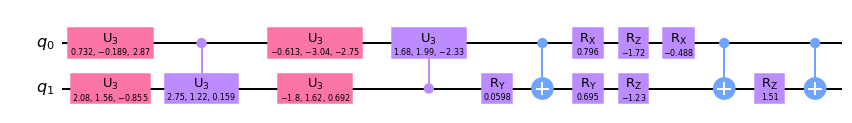

In [23]:
# easy conversion to qiskit
from torchquantum.plugins.qiskit_plugin import tq2qiskit

circ = tq2qiskit(q_dev, model)
circ.draw('mpl')

In [ ]:
# 

In [25]:
# easy deployment on real quantum machine
from torchquantum.plugins.qiskit_plugin import tq2qiskit
from torchquantum.plugins.qiskit_processor import QiskitProcessor
from qiskit import IBMQ
IBMQ.save_account('0238b0afc0dc515fe7987b02706791d1719cb89b68befedc125eded0607e6e9e9f26d3eed482f66fdc45fdfceca3aab2edb9519d96b39e9c78040194b86e7858', overwrite=True)

processor = QiskitProcessor(use_real_qc=False, max_jobs=1)
circ = tq2qiskit(q_dev, model)
circ.measure_all()

res = processor.process_ready_circs(q_dev, [circ])

# this is the expectation value
print(res)


100%|██████████| 1/1 [00:00<00:00, 25.18it/s]


Job Status: job has successfully run
tensor([[0.1365, 0.3152]], dtype=torch.float64)


In [ ]:
# speedup comparison with Qiskit


In [3]:
! pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 35.4 MB/s 
     |████████████████████████████████| 13.6 MB 29.3 MB/s 
     |████████████████████████████████| 108 kB 68.7 MB/s 


In [12]:
# Speed comparison with pennylane

import pennylane as qml
from pennylane import numpy as np
import random
import time 


In [18]:
n_wires = 10
bsz = 32
use_gpu=False

In [19]:
dev=qml.device("default.qubit",wires=n_wires)

@qml.qnode(dev,interface="torch")
def pennylane_circ(params):
    qml.Rot(params[0],params[1],params[2],wires=0)
    qml.Rot(params[3],params[4],params[5],wires=1)
    qml.ctrl(qml.Rot,control=0)(params[6],params[7],params[8],wires=1)
    qml.Rot(params[9],params[10],params[11],wires=0)
    qml.Rot(params[12],params[13],params[14],wires=1)  
    qml.ctrl(qml.Rot,control=1)(params[15],params[16],params[17],wires=0)
    return qml.state()



if use_gpu:
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

params=np.zeros(18)

reps = 20
start = time.time()
for _ in range(reps):
  for k in range(bsz):
    pennylane_circ(params)

end = time.time()
pennylane_time = (end-start)/reps
print(f"Pennylane inference time: {pennylane_time}")


Pennylane inference time: 0.3734148144721985


In [20]:
reps = 1000
'''
Circuit definition in torchquantum
'''
class QModel(tq.QuantumModule):
    def __init__(self, bsz, n_wires):
        super().__init__()
        self.bsz = bsz
        self.n_wires = n_wires
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)
        
    def forward(self, q_device: tq.QuantumDevice):
        q_device.reset_states(self.bsz)
        self.u3_0(q_device, wires=0)
        self.u3_1(q_device, wires=1)
        self.cu3_0(q_device, wires=[0, 1])
        self.u3_2(q_device, wires=0)
        self.u3_3(q_device, wires=1)
        self.cu3_1(q_device, wires=[1, 0])

tq_circ = QModel(n_wires=n_wires, bsz=bsz).to(device)
q_device = tq.QuantumDevice(n_wires=n_wires)


start = time.time()
for _ in range(reps):
  tq_circ(q_device)

end = time.time()
tq_time = (end-start)/reps

print(f"TorchQuantum inference time {tq_time}; is {pennylane_time/tq_time} X faster")

TorchQuantum inference time 0.004048892259597778; is 92.22641417218001 X faster


In [26]:
# basic pulse
pulse = tq.QuantumPulseDirect(n_steps=4,
                                  hamil=[[0, 1], [1, 0]])
pulse.get_unitary()


tensor([[-0.6536+0.0000j,  0.0000+0.7568j],
        [ 0.0000+0.7568j, -0.6536+0.0000j]], grad_fn=<MmBackward0>)

In [28]:
theta = 0.6 * np.pi
target_unitary = torch.tensor([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]], dtype=torch.complex64)
loss = 1 - (torch.trace(pulse.get_unitary() @ target_unitary) / target_unitary.shape[0]).abs() ** 2
loss.backward()
print(pulse.pulse_shape.grad)


tensor([-0.4441, -0.4441, -0.4441, -0.4441])


## 1.3 TorchQuantum for state preparation circuit

In [29]:
import torch
import torch.optim as optim
import argparse

import torchquantum as tq
from torch.optim.lr_scheduler import CosineAnnealingLR

import random
import numpy as np

In [34]:

class QModel(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 2
        self.u3_0 = tq.U3(has_params=True, trainable=True)
        self.u3_1 = tq.U3(has_params=True, trainable=True)
        self.cu3_0 = tq.CU3(has_params=True, trainable=True)
        self.cu3_1 = tq.CU3(has_params=True, trainable=True)
        self.u3_2 = tq.U3(has_params=True, trainable=True)
        self.u3_3 = tq.U3(has_params=True, trainable=True)

    def forward(self, q_state: tq.QuantumState):
        q_state.reset_states(1)
        self.u3_0(q_state, wires=0)
        self.u3_1(q_state, wires=1)
        self.cu3_0(q_state, wires=[0, 1])
        self.u3_2(q_state, wires=0)
        self.u3_3(q_state, wires=1)
        self.cu3_1(q_state, wires=[1, 0])

def train(target_state, state, model, optimizer):
    model(state)
    result_state = state.get_states_1d()[0]

    # compute the state infidelity
    loss = 1 - torch.dot(result_state, target_state).abs() ** 2

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"infidelity (loss): {loss.item()}, \n target state : "
          f"{target_state.detach().cpu().numpy()}, \n "
          f"result state : {result_state.detach().cpu().numpy()}\n")

In [35]:
def main(n_epochs=3000):
    seed = 42
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    model = QModel().to(device)

    optimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=0)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    q_device = tq.QuantumState(n_wires=2)
    target_state = torch.tensor([0, 1, 0, 0], dtype=torch.complex64)

    for epoch in range(1, n_epochs + 1):
        print(f"Epoch {epoch}, LR: {optimizer.param_groups[0]['lr']}")
        train(target_state, q_device, model, optimizer)
        scheduler.step()

In [ ]:
main(n_epochs=3000)

## 1.4 TorchQuantum for VQE circuit 

In [37]:
import torchquantum as tq
import torch
import torch.nn.functional as F
from torchquantum.vqe_utils import parse_hamiltonian_file
from torchquantum.datasets import VQE
import random
import numpy as np
import argparse
import torch.optim as optim

from torch.optim.lr_scheduler import CosineAnnealingLR, ConstantLR



In [38]:
class QVQEModel(tq.QuantumModule):
    def __init__(self, arch, hamil_info):
        super().__init__()
        self.arch = arch
        self.hamil_info = hamil_info
        self.n_wires = hamil_info['n_wires']
        self.n_blocks = arch['n_blocks']
        self.u3_layers = tq.QuantumModuleList()
        self.cu3_layers = tq.QuantumModuleList()
        for _ in range(self.n_blocks):
            self.u3_layers.append(tq.Op1QAllLayer(op=tq.U3,
                                                  n_wires=self.n_wires,
                                                  has_params=True,
                                                  trainable=True,
                                                  ))
            self.cu3_layers.append(tq.Op2QAllLayer(op=tq.CU3,
                                                   n_wires=self.n_wires,
                                                   has_params=True,
                                                   trainable=True,
                                                   circular=True
                                                   ))
        self.measure = tq.MeasureMultipleTimes(
            obs_list=hamil_info['hamil_list'])

    def forward(self, q_device):
        q_device.reset_states(bsz=1)
        for k in range(self.n_blocks):
            self.u3_layers[k](q_device)
            self.cu3_layers[k](q_device)
        x = self.measure(q_device)

        hamil_coefficients = torch.tensor([hamil['coefficient'] for hamil in
                                           self.hamil_info['hamil_list']],
                                          device=x.device).double()

        for k, hamil in enumerate(self.hamil_info['hamil_list']):
            for wire, observable in zip(hamil['wires'], hamil['observables']):
                if observable == 'i':
                    x[k][wire] = 1
            for wire in range(q_device.n_wires):
                if wire not in hamil['wires']:
                    x[k][wire] = 1

        x = torch.cumprod(x, dim=-1)[:, -1].double()
        x = torch.dot(x, hamil_coefficients)

        if x.dim() == 0:
            x = x.unsqueeze(0)

        return x


def train(dataflow, q_device, model, device, optimizer):
    for _ in dataflow['train']:
        outputs = model(q_device)
        loss = outputs.mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"Expectation of energy: {loss.item()}")


def valid_test(dataflow, q_device, split, model, device):
    with torch.no_grad():
        for _ in dataflow[split]:
            outputs = model(q_device)
    loss = outputs.mean()

    print(f"Expectation of energy: {loss}")


In [45]:
class Args(object):
  def __init__(self):
    pass

def main():
    # parser = argparse.ArgumentParser()
    # parser.add_argument('--pdb', action='store_true', help='debug with pdb')
    # parser.add_argument('--n_blocks', type=int, default=2,
    #                     help='number of blocks, each contain one layer of '
    #                          'U3 gates and one layer of CU3 with '
    #                          'ring connections')
    # parser.add_argument('--steps_per_epoch', type=int, default=10,
    #                     help='number of training epochs')
    # parser.add_argument('--epochs', type=int, default=100,
    #                     help='number of training epochs')
    # parser.add_argument('--hamil_filename', type=str, default='./h2_new.txt',
    #                     help='number of training epochs')

    args = Args()
    args.n_blocks = 2
    args.steps_per_epoch=100
    args.epochs=100
    args.hamil_filename = '/content/h2_new.txt'

    # if args.pdb:
    #     import pdb
    #     pdb.set_trace()

    seed = 0
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    dataset = VQE(steps_per_epoch=args.steps_per_epoch)

    dataflow = dict()

    for split in dataset:
        if split == 'train':
            sampler = torch.utils.data.RandomSampler(dataset[split])
        else:
            sampler = torch.utils.data.SequentialSampler(dataset[split])
        dataflow[split] = torch.utils.data.DataLoader(
            dataset[split],
            batch_size=1,
            sampler=sampler,
            num_workers=1,
            pin_memory=True)

    hamil_info = parse_hamiltonian_file(args.hamil_filename)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    model = QVQEModel(arch={"n_blocks": args.n_blocks},
                       hamil_info=hamil_info)

    model.to(device)

    n_epochs = args.epochs
    optimizer = optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    q_device = tq.QuantumDevice(n_wires=hamil_info['n_wires'])
    q_device.reset_states(bsz=1)

    for epoch in range(1, n_epochs + 1):
        # train
        print(f"Epoch {epoch}, LR: {optimizer.param_groups[0]['lr']}")
        train(dataflow, q_device, model, device, optimizer)

        # valid
        valid_test(dataflow, q_device, 'valid', model, device)
        scheduler.step()

    # final valid
    valid_test(dataflow, q_device, 'valid', model, device)

In [46]:
main()

Streaming output truncated to the last 5000 lines.
Expectation of energy: -1.8733160556973474
Expectation of energy: -1.8733161532177949
Expectation of energy: -1.8733159582294538
Expectation of energy: -1.8733159582005976
Expectation of energy: -1.8733158362935873
Expectation of energy: -1.8733159581892525
Expectation of energy: -1.873316055626224
Expectation of energy: -1.8733159581274088
Expectation of energy: -1.873315738810238
Expectation of energy: -1.8733158363616071
Expectation of energy: -1.8733159582376957
Expectation of energy: -1.873316055727221
Expectation of energy: -1.8733159582366579
Expectation of energy: -1.8733159582871663
Expectation of energy: -1.8733158363667455
Expectation of energy: -1.873315836461597
Expectation of energy: -1.873315958311912
Expectation of energy: -1.8733159582789247
Expectation of energy: -1.8733160558086517
Expectation of energy: -1.8733158364203577
Expectation of energy: -1.8733160557581532
Expectation of energy: -1.8733157388596986
Expectat

KeyboardInterrupt: ignored

## 1.5 TorchQuantum for QNN circuit

In [47]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import argparse

import torchquantum as tq
import torchquantum.functional as tqf

from torchquantum.plugins import (tq2qiskit_expand_params,
                                  tq2qiskit,
                                  tq2qiskit_measurement,
                                  qiskit_assemble_circs)

from torchquantum.datasets import MNIST
from torch.optim.lr_scheduler import CosineAnnealingLR

import random
import numpy as np

In [49]:
class QFCModel(tq.QuantumModule):
    class QLayer(tq.QuantumModule):
        def __init__(self):
            super().__init__()
            self.n_wires = 4
            self.random_layer = tq.RandomLayer(n_ops=50,
                                               wires=list(range(self.n_wires)))

            # gates with trainable parameters
            self.rx0 = tq.RX(has_params=True, trainable=True)
            self.ry0 = tq.RY(has_params=True, trainable=True)
            self.rz0 = tq.RZ(has_params=True, trainable=True)
            self.crx0 = tq.CRX(has_params=True, trainable=True)

        @tq.static_support
        def forward(self, q_device: tq.QuantumDevice):
            """
            1. To convert tq QuantumModule to qiskit or run in the static
            model, need to:
                (1) add @tq.static_support before the forward
                (2) make sure to add
                    static=self.static_mode and
                    parent_graph=self.graph
                    to all the tqf functions, such as tqf.hadamard below
            """
            self.q_device = q_device

            self.random_layer(self.q_device)

            # some trainable gates (instantiated ahead of time)
            self.rx0(self.q_device, wires=0)
            self.ry0(self.q_device, wires=1)
            self.rz0(self.q_device, wires=3)
            self.crx0(self.q_device, wires=[0, 2])

            # add some more non-parameterized gates (add on-the-fly)
            tqf.hadamard(self.q_device, wires=3, static=self.static_mode,
                         parent_graph=self.graph)
            tqf.sx(self.q_device, wires=2, static=self.static_mode,
                   parent_graph=self.graph)
            tqf.cnot(self.q_device, wires=[3, 0], static=self.static_mode,
                     parent_graph=self.graph)
            tqf.rx(self.q_device, wires=1, params=torch.tensor([0.1]),
                   static=self.static_mode, parent_graph=self.graph)

    def __init__(self):
        super().__init__()
        self.n_wires = 4
        self.q_device = tq.QuantumDevice(n_wires=self.n_wires)
        self.encoder = tq.GeneralEncoder(
            tq.encoder_op_list_name_dict['4x4_ryzxy'])

        self.q_layer = self.QLayer()
        self.measure = tq.MeasureAll(tq.PauliZ)

    def forward(self, x, use_qiskit=False):
        bsz = x.shape[0]
        x = F.avg_pool2d(x, 6).view(bsz, 16)
        devi = x.device

        if use_qiskit:
            encoder_circs = tq2qiskit_expand_params(self.q_device, x,
                                                    self.encoder.func_list)
            q_layer_circ = tq2qiskit(self.q_device, self.q_layer)
            measurement_circ = tq2qiskit_measurement(self.q_device,
                                                     self.measure)
            assembled_circs = qiskit_assemble_circs(encoder_circs,
                                                    q_layer_circ,
                                                    measurement_circ)
            x0 = self.qiskit_processor.process_ready_circs(
                self.q_device, assembled_circs).to(devi)
            # x1 = self.qiskit_processor.process_parameterized(
            #     self.q_device, self.encoder, self.q_layer, self.measure, x)
            # print((x0-x1).max())
            x = x0

        else:
            self.encoder(self.q_device, x)
            self.q_layer(self.q_device)
            x = self.measure(self.q_device)

        x = x.reshape(bsz, 2, 2).sum(-1).squeeze()
        x = F.log_softmax(x, dim=1)

        return x


def train(dataflow, model, device, optimizer):
    for feed_dict in dataflow['train']:
        inputs = feed_dict['image'].to(device)
        targets = feed_dict['digit'].to(device)

        outputs = model(inputs)
        loss = F.nll_loss(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"loss: {loss.item()}", end='\r')


def valid_test(dataflow, split, model, device, qiskit=False):
    target_all = []
    output_all = []
    with torch.no_grad():
        for feed_dict in dataflow[split]:
            inputs = feed_dict['image'].to(device)
            targets = feed_dict['digit'].to(device)

            outputs = model(inputs, use_qiskit=qiskit)

            target_all.append(targets)
            output_all.append(outputs)
        target_all = torch.cat(target_all, dim=0)
        output_all = torch.cat(output_all, dim=0)

    _, indices = output_all.topk(1, dim=1)
    masks = indices.eq(target_all.view(-1, 1).expand_as(indices))
    size = target_all.shape[0]
    corrects = masks.sum().item()
    accuracy = corrects / size
    loss = F.nll_loss(output_all, target_all).item()

    print(f"{split} set accuracy: {accuracy}")
    print(f"{split} set loss: {loss}")


In [52]:

def main():
    # parser = argparse.ArgumentParser()
    # parser.add_argument('--static', action='store_true', help='compute with '
    #                                                           'static mode')
    # parser.add_argument('--pdb', action='store_true', help='debug with pdb')
    # parser.add_argument('--wires-per-block', type=int, default=2,
    #                     help='wires per block int static mode')
    # parser.add_argument('--epochs', type=int, default=5,
    #                     help='number of training epochs')

    # args = parser.parse_args()

    # if args.pdb:
        # import pdb
        # pdb.set_trace()

    n_epochs = 5
    seed = 0
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    dataset = MNIST(
        root='./mnist_data',
        train_valid_split_ratio=[0.9, 0.1],
        digits_of_interest=[3, 6],
        n_test_samples=75,
    )
    dataflow = dict()

    for split in dataset:
        sampler = torch.utils.data.RandomSampler(dataset[split])
        dataflow[split] = torch.utils.data.DataLoader(
            dataset[split],
            batch_size=256,
            sampler=sampler,
            num_workers=8,
            pin_memory=True)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    model = QFCModel().to(device)

    optimizer = optim.Adam(model.parameters(), lr=5e-3, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs)

    for epoch in range(1, n_epochs + 1):
        # train
        print(f"Epoch {epoch}:")
        train(dataflow, model, device, optimizer)
        print(optimizer.param_groups[0]['lr'])

        # valid
        valid_test(dataflow, 'valid', model, device)
        scheduler.step()

    # test
    valid_test(dataflow, 'test', model, device, qiskit=False)

    # run on Qiskit simulator and real Quantum Computers
    try:
        from qiskit import IBMQ
        from torchquantum.plugins import QiskitProcessor

        # firstly perform simulate
        print(f"\nTest with Qiskit Simulator")
        processor_simulation = QiskitProcessor(use_real_qc=False)
        model.set_qiskit_processor(processor_simulation)
        valid_test(dataflow, 'test', model, device, qiskit=True)

        # then try to run on REAL QC
        backend_name = 'ibmq_lima'
        print(f"\nTest on Real Quantum Computer {backend_name}")
        # Please specify your own hub group and project if you have the
        # IBMQ premium plan to access more machines.
        processor_real_qc = QiskitProcessor(use_real_qc=True,
                                            backend_name=backend_name,
                                            hub='ibm-q',
                                            group='open',
                                            project='main',
                                            )
        model.set_qiskit_processor(processor_real_qc)
        valid_test(dataflow, 'test', model, device, qiskit=True)
    except ImportError:
        print("Please install qiskit, create an IBM Q Experience Account and "
              "save the account token according to the instruction at "
              "'https://github.com/Qiskit/qiskit-ibmq-provider', "
              "then try again.")

In [53]:
main()

[2022-09-18 05:29:24.683] Only use the front 75 images as TEST set.


Epoch 1:
0.005
valid set accuracy: 0.700414937759336
valid set loss: 0.6310521364212036
Epoch 2:


KeyboardInterrupt: ignored